Este trabajo hace referencia a [este tutorial](https://www.datacamp.com/community/tutorials/wordcloud-python), con el fin de realizar un análisis de datos exploratorios para el procesamiento de lenguaje natural usando WordCloud en Python, objetivos:

- Crear un wordcloud básico de uno o varios documentos de texto
- Ajustar el color, el tamaño y la cantidad de texto dentro de un wordcloud
- Enmascarar tu wordcloud en cualquier forma de tu elección
- Enmascarar tu wordcloud en cualquier patrón de color de tu elección

In [1]:
# Cargando las librerias necesarias
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Cargando el dataframe
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

In [3]:
# Primeras 3 filas del conjunto de datos
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
# Imprimiendo información básica sobre el conjunto de datos usando las funciones print() y .format()

print("Existen {} observaciones y {} caracteristicas en este conjunto de datos. \n".format(df.shape[0],df.shape[1]))
print("Existen {} tipos de vino en este conjunto de datos, tales como: {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))
print("Existen {} países productores de vino en este conjunto de datos como: {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

Existen 129971 observaciones y 13 caracteristicas en este conjunto de datos. 

Existen 708 tipos de vino en este conjunto de datos, tales como: White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

Existen 44 países productores de vino en este conjunto de datos como: Italy, Portugal, US, Spain, France... 



In [5]:
# Imprimiendo información de paises, descripción y puntos
df[["country", "description","points"]].head(9)

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87
5,Spain,Blackberry and raspberry aromas show a typical...,87
6,Italy,"Here's a bright, informal red that opens with ...",87
7,France,This dry and restrained wine offers spice in p...,87
8,Germany,Savory dried thyme notes accent sunnier flavor...,87


In [6]:
# Agrupación por país
country = df.groupby("country")

# Resumen estadístico de todos los países.
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [7]:
# Seleccionamos los 6 puntos promedio más altos entre los 44 países
country.mean().sort_values(by="points",ascending=False).head(6)

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598
Hungary,89.191781,40.648276


In [8]:
# Graficando el histograma de frecuencua de los paises y la cantidad de vinos
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

<Figure size 1500x1000 with 1 Axes>

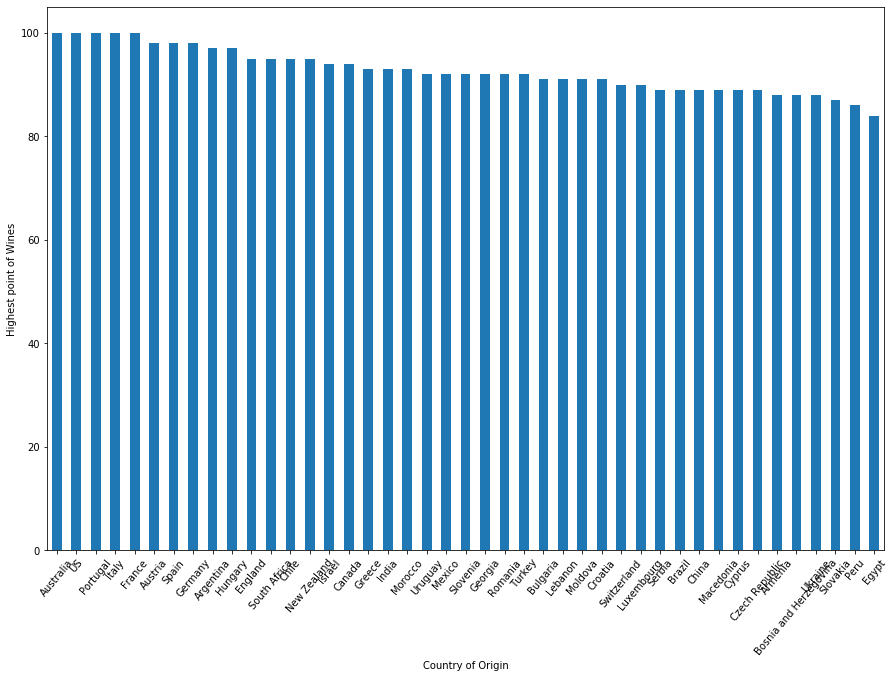

In [9]:
# Graficando el histograma de frecuencua de los paises y los puntos de los vinos
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [10]:
# Comencemos con una descrpción
text = df.description[0]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

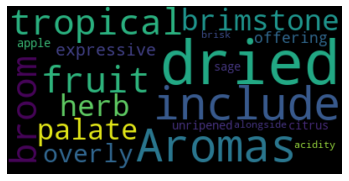

In [11]:
# Creando y generando una imagen de nube de palabras.
wordcloud = WordCloud().generate(text)

# Mostrando la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

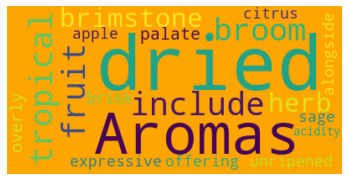

In [12]:
# Bajando el max_font_size, cambiando el número máximo de palabras y colocando un fodo de color
wordcloud = WordCloud(max_font_size=90, max_words=150, background_color="Orange").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
# Guardando la imagen
wordcloud.to_file("WordCloud1.png")

In [14]:
# Combinaciones de palabras de la columna description
text = " ".join(review for review in df.description)
print ("Hay {} palabras en la combinación de todas las revisiones.".format(len(text)))

Hay 31661073 palabras en la combinación de todas las revisiones.


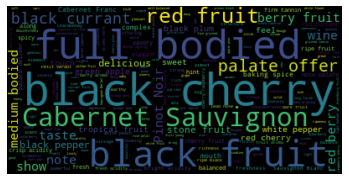

In [15]:
# Creando la lista stopwords a quitar:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ahora trabajaremos la imagen de mascara, para ello trabajemos la siguiente imagen
![titulo](img2.png)

In [16]:
# Creamos un array de una imagen de mascara
wine_mask = np.array(Image.open("img2.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
# Función para transformar los valores a: 0 ó 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0

In [18]:
# Transforma la máscara en una nueva función
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [19]:
# Comprobando el resultado esperado de la máscara
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

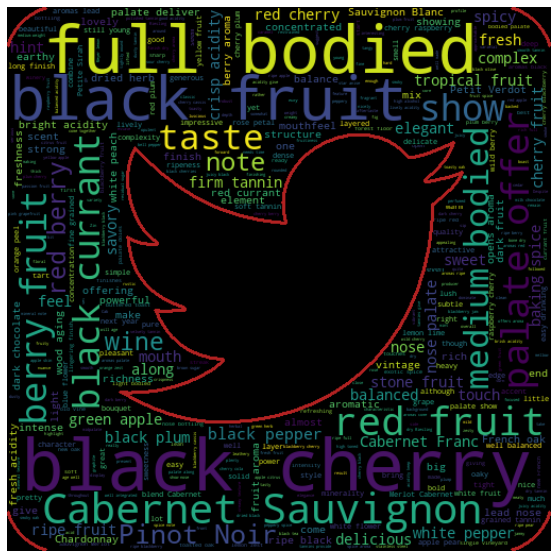

In [20]:
# Creando una imagen de nube de palabras
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
def transform_format(val):
    if val == 0:
        return 0
    else:
        return 255

In [22]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [23]:
transformed_wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

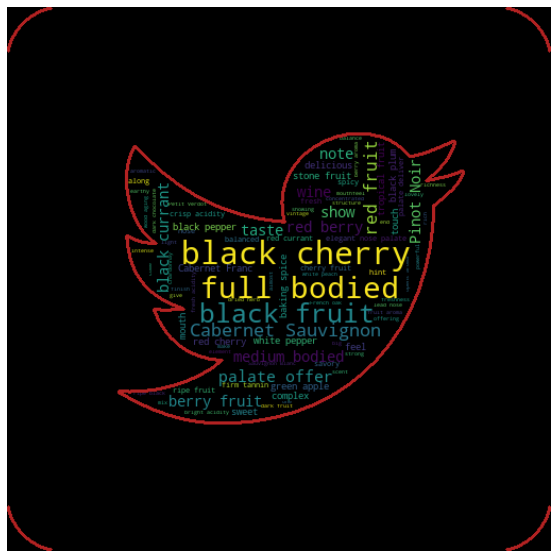

In [24]:
# Creando una imagen de nube de palabras
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()